<a href="https://colab.research.google.com/github/WendyOira/Supervised-ML-Practice-/blob/main/GenderClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a machine learning project on Gender Classification. 

Content
This dataset contains 7 features and a label column.

long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

forehead_width_cm - This column is in CM's. This is the width of the forehead.

forehead_height_cm - This is the height of the forehead and it's in Cm's.

nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".

The data was extracted from kaggle. link >> https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset?resource=download

In [45]:
# Import relevant libraries
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [46]:
# Import file downloaded to my Pc 
uploaded = files.upload()

Saving gender_classification_v7.csv to gender_classification_v7 (1).csv


In [47]:
# Read the data uploaded
gender = pd.read_csv(io.BytesIO(uploaded['gender_classification_v7.csv']))
# View the data
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [48]:
# Description of the data
gender.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Data info 
# The only object data type is gender 
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [50]:
# No. of rows and No. of columns 
gender.shape

(5001, 8)

In [51]:
# Identify duplicates 
gender[gender.duplicated()]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
59,1,14.1,5.9,0,0,0,0,Female
66,1,14.2,6.2,0,0,0,0,Female
175,1,12.7,5.7,1,1,1,1,Male
230,1,12.9,5.1,0,0,0,0,Female
261,1,13.0,6.2,1,1,1,1,Male
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [52]:
# No. of duplicated values in the data 
gender.duplicated().sum()

1768

In [53]:
# Drop duplicate values 
gender_dup = gender.drop_duplicates()
gender_dup.shape

(3233, 8)

In [54]:
# View the new data
gender_dup.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [55]:
# Check for any missing values 
gender_dup.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [56]:
# Correlation of variables
gender_dup.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.013151,-0.005145,0.024123,0.042556,0.037514,-0.011362
forehead_width_cm,-0.013151,1.000000,0.079665,0.212223,0.212032,0.220566,0.206636
forehead_height_cm,-0.005145,0.079665,1.000000,0.180526,0.153438,0.170018,0.183036
nose_wide,0.024123,0.212223,0.180526,1.000000,0.394605,0.379767,0.395401
nose_long,0.042556,0.212032,0.153438,0.394605,1.000000,0.384860,0.377462
lips_thin,0.037514,0.220566,0.170018,0.379767,0.384860,1.000000,0.380805
distance_nose_to_lip_long,-0.011362,0.206636,0.183036,0.395401,0.377462,0.380805,1.000000


<Axes: >

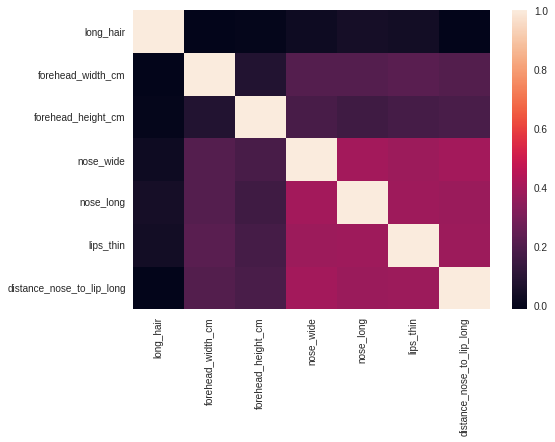

In [57]:
# Correlation heatmap
sns.heatmap(gender_dup.corr())

MACHINE LEARNING MODELS

In [58]:
from sklearn.preprocessing import LabelEncoder
# Using Labelencoder to convert categorical to numerical
le = LabelEncoder()
gender_dup.iloc[:,7]= le.fit_transform(gender_dup.iloc[:,7])
gender_dup.head(5)

<ipython-input-58-8913518bee50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_dup.iloc[:,7]= le.fit_transform(gender_dup.iloc[:,7])


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [59]:
# Separate values into X and Y values
X = gender_dup.iloc[:,0:7]
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1
4990,1,12.6,5.7,0,0,1,0
4992,1,14.1,7.0,1,1,1,1
4993,1,11.6,5.9,0,0,0,1


In [60]:
# Separate values into X and Y values
y = gender_dup.iloc[:,7]
y

0       1
1       0
2       1
3       1
4       0
       ..
4986    1
4990    0
4992    1
4993    0
4995    1
Name: gender, Length: 3233, dtype: int64

In [61]:
# Perform KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Split into training and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [62]:
# KNN Classifier implementation
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn2 = KNeighborsClassifier(n_neighbors=2)

In [63]:
# Prediction for the KNN classifiers
knn5.fit(X_train, y_train)
knn2.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_2 = knn2.predict(X_test)

In [64]:
# Predict the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)

Accuracy with k=5 93.94313967861557
Accuracy with k=2 94.43757725587145


Text(0, 0.5, 'Accuracy Score')

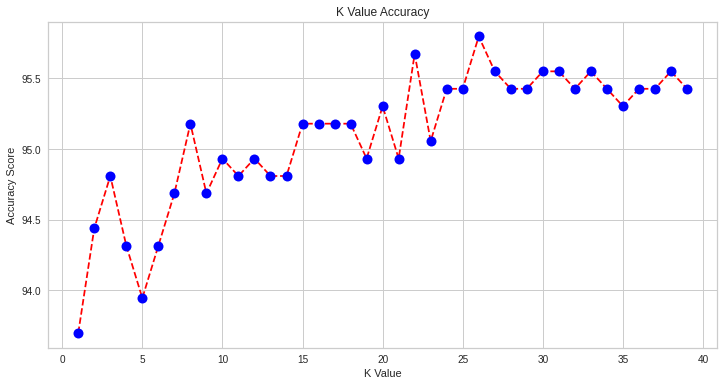

In [65]:
# Find the optimal k value
accuracy = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  acc = accuracy_score(y_test, pred_i)*100
  accuracy.append(acc)

# Plot
plt.figure(figsize = (12,6))
plt.plot(range(1,40), accuracy, color = 'red', linestyle = 'dashed',marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('K Value Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [66]:
# The K value with thw highest accuracy score is 26
# KNN Classifier implementation
knn26 = KNeighborsClassifier(n_neighbors = 26)
# Prediction for the KNN classifiers
knn26.fit(X_train, y_train)
y_pred_26 = knn26.predict(X_test)
# Predict the accuracy
print("Accuracy with k=26", accuracy_score(y_test, y_pred_26)*100)

Accuracy with k=26 95.7972805933251


In [67]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_26 = confusion_matrix(y_test, y_pred_26)
print(cm_26)

[[376   9]
 [ 25 399]]


We have 775 correct predictions and 34 incorrect predictions

In [68]:
# Compute precion, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_26))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       385
           1       0.98      0.94      0.96       424

    accuracy                           0.96       809
   macro avg       0.96      0.96      0.96       809
weighted avg       0.96      0.96      0.96       809



Precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

Recall is intuitively the ability of the classifier to find all the positive samples.

In [69]:
# Perform Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
# Predict the accuracy
print("Accuracy of the logistic regression is ", accuracy_score(y_test, y_pred_log)*100)

Accuracy of the logistic regression is  94.93201483312733


In [70]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

[[363  22]
 [ 19 405]]


We have 768 correct predictions and 41 incorrect predictions

In [71]:
# Compute precion, recall, F-measure and support
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       385
           1       0.95      0.96      0.95       424

    accuracy                           0.95       809
   macro avg       0.95      0.95      0.95       809
weighted avg       0.95      0.95      0.95       809



In [72]:
# Naive Bayes
# Model building and training
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

In [73]:
# Model evaluaton
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_naive = model.predict(X_test)

accuray = accuracy_score(y_pred_naive, y_test)
f1 = f1_score(y_pred_naive, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9542645241038319
F1 Score: 0.9542408800649321


In [74]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train the model
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9394313967861557


In [76]:
# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
print(cm_tree)

[[361  24]
 [ 25 399]]


There are 759 correct prediction and 50 incorrect predictions

In [77]:
# Compute precion, recall, F-measure and support
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       385
           1       0.94      0.94      0.94       424

    accuracy                           0.94       809
   macro avg       0.94      0.94      0.94       809
weighted avg       0.94      0.94      0.94       809



In [78]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Predict 
y_pred_forest = rf.predict(X_test)
# Calculate accuracy score
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy_forest)

Accuracy: 0.9468479604449939


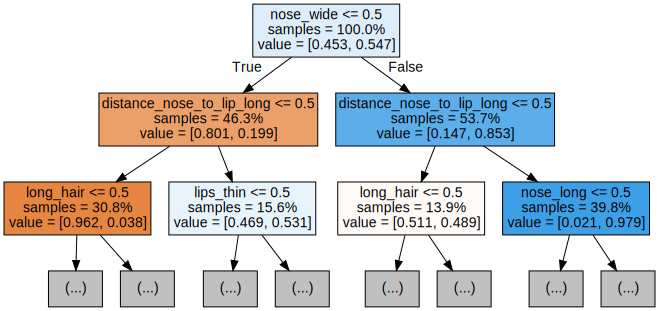

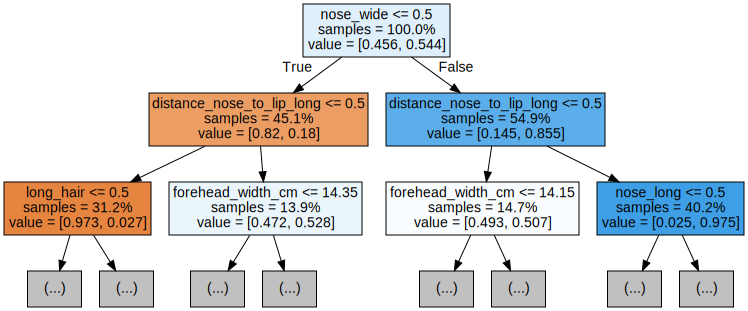

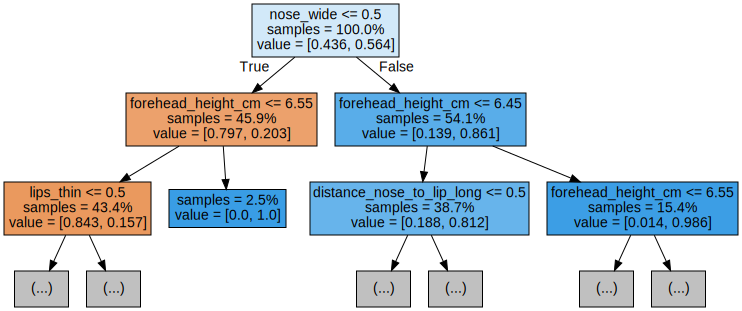

In [79]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [80]:
# Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7ee29c70d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7ee3c90820>})

In [81]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 430}


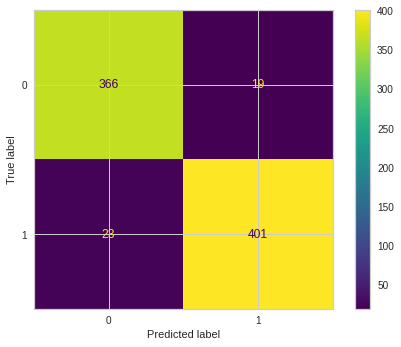

In [82]:
# Generate predictions with the best model
y_pred1_forest= best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred1_forest)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [83]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1_forest))

Accuracy: 0.9480840543881335


In [84]:
# Support Vector Machine 
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

In [85]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9394313967861557


In [86]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svm))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Precision: 0.9432624113475178
Recall: 0.9410377358490566
